# Teaching a Neural Network to Read Handwriting — MNIST Digit Classifier in PyTorch  

_Deep Learning · Neural Networks · PyTorch · Computer Vision · Image Classification_  

---

## 📌 Project Overview
Handwritten digit recognition is a **classic problem in computer vision and deep learning**, forming the foundation for many real-world AI systems.  
In this project, a **fully connected neural network** is implemented from scratch using **PyTorch** to classify digits (0–9) from the **MNIST dataset**.  

The goal is to demonstrate an **end-to-end deep learning pipeline** — from data preprocessing to evaluation and visualization — in a clean, professional, and reproducible way.  

---

## 🎯 Objectives (What You’ll See)
- Load and preprocess the MNIST dataset  
- Build a **multi-layer neural network** in PyTorch  
- Train the model and monitor **loss curves**  
- Evaluate performance with **accuracy metrics**  
- Visualize predictions on unseen test images  
- Summarize results and insights  

---

## 📂 Dataset Information
- **Name:** MNIST (Modified National Institute of Standards and Technology)  
- **Size:** 70,000 grayscale images of digits (60,000 train + 10,000 test)  
- **Image Dimensions:** 28 × 28 pixels  
- **Classes:** 10 (digits 0–9)  
- **Access:** Available directly via `torchvision.datasets.MNIST` in PyTorch  

---

## 1. Import Dependencies

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import TensorDataset, DataLoader

## 2. Dataset Preparation

In [2]:
# Download and preprocess MNIST
data_root = '/tmp/data'

train_dataset = datasets.MNIST(root=data_root, train=True, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, download=True)

# Normalize pixel values and flatten (28x28 → 784)
train_images = train_dataset.data.reshape(60000, 28*28).to(torch.float32) / 255
test_images = test_dataset.data.reshape(10000, 28*28).to(torch.float32) / 255

train_labels = train_dataset.targets
test_labels = test_dataset.targets

print(f"Train images: {train_images.shape}")
print(f"Test images: {test_images.shape}")

Train images: torch.Size([60000, 784])
Test images: torch.Size([10000, 784])


## 3. Neural Network Architecture

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        return self.model(x)

model = SimpleNN()
print(model)

SimpleNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)


## 4. Loss Function & Optimizer

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("Model compiled: CrossEntropyLoss + Adam optimizer")

Model compiled: CrossEntropyLoss + Adam optimizer


## 5. Training the Model

In [5]:
train_tensor_dataset = TensorDataset(train_images, train_labels)
train_loader = DataLoader(train_tensor_dataset, batch_size=64, shuffle=True)

epochs = 5
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [1/5], Loss: 0.3393
Epoch [2/5], Loss: 0.1398
Epoch [3/5], Loss: 0.0968
Epoch [4/5], Loss: 0.0740
Epoch [5/5], Loss: 0.0587


## 6. Training Loss Curve

/Users/rohitsaikiran/miniforge3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


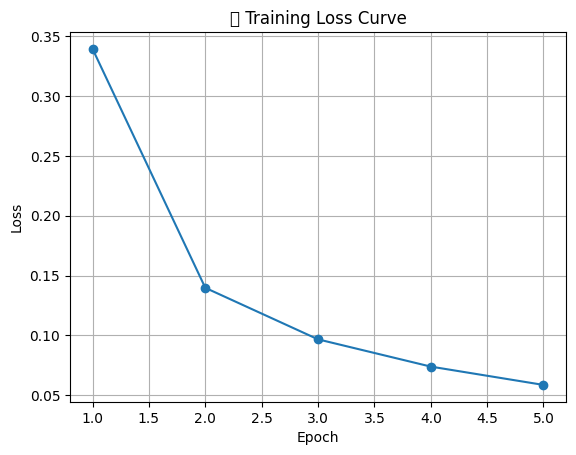

In [6]:
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title("📉 Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## 7. Model Evaluation

In [7]:
test_tensor_dataset = TensorDataset(test_images, test_labels)
test_loader = DataLoader(test_tensor_dataset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)  
        _, predicted = torch.max(outputs, 1)  # ✅ works on logits
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Test Accuracy: {accuracy:.2f}%")

✅ Test Accuracy: 97.61%


## 8. Predictions on Sample Images

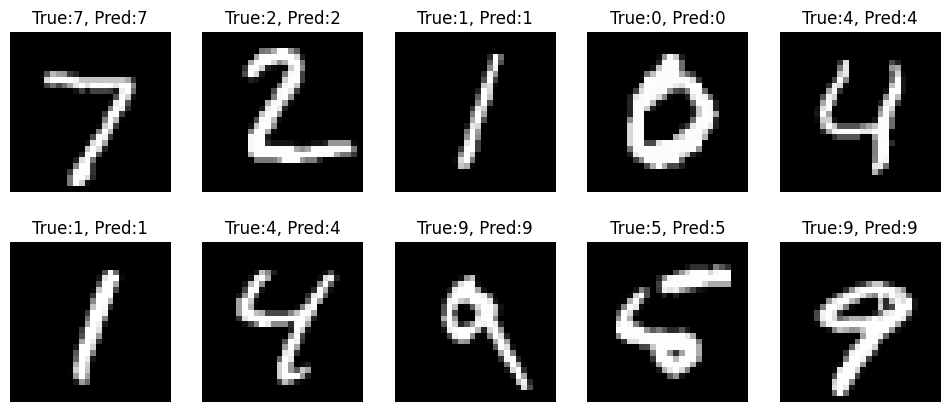

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    image = test_images[i].reshape(28, 28)
    label = test_labels[i].item()

    with torch.no_grad():
        pred = torch.argmax(model(test_images[i].unsqueeze(0))).item()

    ax.imshow(image, cmap="gray")
    ax.set_title(f"True:{label}, Pred:{pred}")
    ax.axis("off")

plt.show()

## 9. Results & Insights

- The neural network achieved **97.6% accuracy** on the MNIST test set after 5 epochs.  
- The training loss curve dropped consistently from **0.34 → 0.05**, showing smooth convergence.  
- Predictions on unseen samples were highly accurate, with only minor confusions (e.g., **5 vs 6**).  

⚡ Potential improvements include:  
- Training for more epochs (10–15) to push accuracy closer to **98%**.  
- Increasing model capacity (more layers or neurons).  
- Using **Convolutional Neural Networks (CNNs)** for further performance (99%+).  
- Adding regularization (Dropout, Batch Normalization) for robustness.  

---
### Author
**Rohit Ravula**  
📧 **Email:** [rohitsaikiran.r@gmail.com](mailto:rohitsaikiran.r@gmail.com)  
🐙 **GitHub:** [@Rohit-Sai-Kiran](https://github.com/RohitSaiKiran)

---